## Предсказание сердечно-сосудистых заболеваний

In [1]:
from sklearn.metrics import log_loss
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)

train = pd.read_csv('train.csv', sep=';', na_values='None')
test = pd.read_csv('test.csv', sep=';', na_values='None')
print('Train shape {}'.format(train.shape))
print('Test shape {}'.format(test.shape))

Train shape (70000, 13)
Test shape (30000, 12)


In [2]:
# Добавляем новый признак - Возраст в годах 
train['age_in_years'] = round(train.age / 365, 2)
test['age_in_years'] = round(test.age / 365, 2)

# Удаляем возраст в днях
train.drop(['age'], axis=1, inplace=True)
test.drop(['age'], axis=1, inplace=True)

#### Fill NaNs in test

In [3]:
test[test['smoke'].isna()] # smoke, alco, active

test['smoke'].fillna(0, inplace=True)
test['alco'].fillna(0, inplace=True)
test['active'].fillna(1, inplace=True)

### Заменяем неверные значения фичей ap_lo, ap_hi

In [4]:
train.loc[1876,'ap_hi'] = 90
train.loc[2014,'ap_hi'] = 90
train.loc[2014,'ap_lo'] = 60
train.loc[4817,'ap_hi'] = 90
train.loc[7763,'ap_hi'] = 115
train.loc[8915,'ap_hi'] = 142
train.loc[9557,'ap_hi'] = 170
train.loc[13895,'ap_hi'] = 150
train.loc[17713,'ap_hi'] = 90
train.loc[23867,'ap_hi'] = 90
train.loc[23867,'ap_lo'] = 60
train.loc[25464,'ap_hi'] = 140
train.loc[25519,'ap_hi'] = 140
train.loc[25780,'ap_hi'] = 140
train.loc[28147,'ap_hi'] = 162
train.loc[29665,'ap_hi'] = 90
train.loc[31783,'ap_hi'] = 90
train.loc[31783,'ap_lo'] = 70
train.loc[36894,'ap_hi'] = 130
train.loc[40330,'ap_hi'] = 130
train.loc[40330,'ap_lo'] = 90
train.loc[40831,'ap_hi'] = 140
train.loc[40852,'ap_hi'] = 160
train.loc[41095,'ap_hi'] = 120
train.loc[41505,'ap_hi'] = 80
train.loc[41505,'ap_lo'] = 60
train.loc[42397,'ap_hi'] = 90
train.loc[42397,'ap_lo'] = 60
train.loc[42658,'ap_hi'] = 90
train.loc[43133,'ap_hi'] = 140
train.loc[43208,'ap_hi'] = 142
train.loc[43504,'ap_hi'] = 130
train.loc[46912,'ap_hi'] = 140
train.loc[47253,'ap_hi'] = 140
train.loc[48795,'ap_hi'] = 140
train.loc[50836,'ap_hi'] = 140
train.loc[51438,'ap_hi'] = 110
train.loc[53982,'ap_hi'] = 96
train.loc[55459,'ap_hi'] = 130
train.loc[55847,'ap_hi'] = 130
train.loc[57291,'ap_hi'] = 130
train.loc[57918,'ap_hi'] = 110
train.loc[63996,'ap_hi'] = 120
train.loc[64911,'ap_hi'] = 90
train.loc[68663,'ap_hi'] = 90
train.loc[68663,'ap_lo'] = 60
train.loc[69370,'ap_hi'] = 200

In [5]:
train.loc[2142, 'ap_lo'] = 110
train.loc[7598, 'ap_lo'] = 80
train.loc[9777, 'ap_lo'] = 80
train.loc[10106, 'ap_lo'] = 100
train.loc[13489, 'ap_lo'] = 80
train.loc[16459, 'ap_lo'] = 90
train.loc[17381, 'ap_lo'] = 90
train.loc[18898, 'ap_lo'] = 70
train.loc[19075, 'ap_lo'] = 70
train.loc[22923, 'ap_lo'] = 95
train.loc[25454, 'ap_hi'] = 120
train.loc[26513, 'ap_hi'] = 160
train.loc[26513, 'ap_lo'] = 100
train.loc[27686, 'ap_lo'] = 90
train.loc[28065, 'ap_lo'] = 60
train.loc[35140, 'ap_lo'] = 85
train.loc[35369, 'ap_lo'] = 110
train.loc[37169, 'ap_lo'] = 110
train.loc[38370, 'ap_lo'] = 90
train.loc[38599, 'ap_lo'] = 90
train.loc[42086, 'ap_lo'] = 110
train.loc[43307, 'ap_lo'] = 110
train.loc[43575, 'ap_lo'] = 120
train.loc[43922, 'ap_lo'] = 80
train.loc[45050, 'ap_lo'] = 120
train.loc[45835, 'ap_lo'] = 90
train.loc[47711, 'ap_lo'] = 90
train.loc[48049, 'ap_lo'] = 80
train.loc[52580, 'ap_hi'] = 130
train.loc[52580, 'ap_lo'] = 85
train.loc[52851, 'ap_hi'] = 120
train.loc[52851, 'ap_lo'] = 80
train.loc[56950, 'ap_lo'] = 80
train.loc[60106, 'ap_hi'] = 150
train.loc[60106, 'ap_lo'] = 95
train.loc[63787, 'ap_lo'] = 60
train.loc[64068, 'ap_lo'] = 100
train.loc[65303, 'ap_lo'] = 80
train.loc[66108, 'ap_lo'] = 140
train.loc[68568, 'ap_lo'] = 60

In [6]:
test.loc[303, 'ap_hi'] = 140
test.loc[1685, 'ap_hi'] = 110
test.loc[1707, 'ap_lo'] = 130
test.loc[2443, 'ap_hi'] = 160
test.loc[2443, 'ap_lo'] = 100
test.loc[5176, 'ap_hi'] = 120
test.loc[6400, 'ap_hi'] = 160
test.loc[6400, 'ap_lo'] = 100
test.loc[6870, 'ap_lo'] = 70
test.loc[6958, 'ap_hi'] = 110

test.loc[7463, 'ap_hi'] = 100
test.loc[7638, 'ap_lo'] = 100
test.loc[7755, 'ap_hi'] = 140
test.loc[7906, 'ap_lo'] = 80
test.loc[8295, 'ap_hi'] = 170
test.loc[8295, 'ap_lo'] = 105
test.loc[8852, 'ap_hi'] = 120
test.loc[9262, 'ap_hi'] = 100
test.loc[9399, 'ap_hi'] = 140
test.loc[10566, 'ap_hi'] = 150
test.loc[11068, 'ap_lo'] = 90
test.loc[12852, 'ap_hi'] = 130
test.loc[12852, 'ap_lo'] = 85
test.loc[13138, 'ap_hi'] = 100
test.loc[13138, 'ap_lo'] = 60
test.loc[13449, 'ap_hi'] = 140
test.loc[13563, 'ap_hi'] = 140
test.loc[14449, 'ap_hi'] = 150
test.loc[15437, 'ap_lo'] = 70
test.loc[15457, 'ap_lo'] = 180
test.loc[16009, 'ap_lo'] = 60
test.loc[17093, 'ap_lo'] = 80
test.loc[18547, 'ap_hi'] = 160

test.loc[18857, 'ap_hi'] = 150
test.loc[18857, 'ap_lo'] = 100
test.loc[20074, 'ap_lo'] = 80
test.loc[24125, 'ap_lo'] = 90
test.loc[24391, 'ap_hi'] = 120
test.loc[24538, 'ap_lo'] = 80
test.loc[26009, 'ap_lo'] = 100
test.loc[26412, 'ap_hi'] = 100
test.loc[26877, 'ap_lo'] = 70
test.loc[27148, 'ap_lo'] = 90
test.loc[29327, 'ap_lo'] = 80
test.loc[29884, 'ap_lo'] = 100
test.loc[29982, 'ap_hi'] = 190
test.loc[29982, 'ap_lo'] = 100

### Проверим распредление фичей

In [7]:
y = train['cardio']
train_data = train.drop(['cardio'], axis=1)
data = pd.concat([train_data, test], ignore_index=True)

In [8]:
# Посмотрим на данные у которых рост и вес совпадают с давлением. Скорее всего значения ошибочные

index1 = list(data[(data['height'] == data['ap_hi']) & (data['weight'] == data['ap_lo'])].index)

# Средние значения веса для мужчины и женщины
man_weight = train[train['gender'] == 2]['weight'].mean()
woman_weight = train[train['gender'] == 1]['weight'].mean()
# Средние значения роста для мужчины и женщины
man_height = train[train['gender'] == 2]['height'].mean()
woman_height = train[train['gender'] == 1]['height'].mean()

for ind in index1:
    gender = data.loc[ind, 'gender'] # '2' - man, '1' - woman.
    if gender == 1:
        data.loc[ind, 'weight'] = woman_weight
        data.loc[ind, 'height'] = woman_height
    else:
        data.loc[ind, 'weight'] = man_weight
        data.loc[ind, 'height'] = man_height

In [9]:
data.loc[8171, 'height'] = 170
data.loc[8171, 'weight'] = 97
data.loc[88312, 'height'] = 173
data.loc[88312, 'weight'] = 87
index2 = list(data[(data['height'] < 100) & (data['gender'] == 2) & (data['weight'] > 40)].index)
for ind in index2:
    data.loc[ind, 'height'] = data.loc[ind, 'height'] + 100

In [10]:
# меняем местами рост и вес
data.loc[12770, 'weight'] = 75
data.loc[12770, 'height'] = 168
data.loc[23913, 'height'] = 156
data.loc[23913, 'weight'] = 81
data.loc[27384, 'height'] = 178
data.loc[27384, 'weight'] = 80
data.loc[70730, 'height'] = 183
data.loc[70730, 'weight'] = 58
data.loc[85109, 'height'] = 155
data.loc[85109, 'weight'] = 60

index3 = list(data[(data['gender'] == 1) & (data['height'] < 100)].index)
for ind in index3:
    data.loc[ind, 'height'] = data.loc[ind, 'height'] + 100

In [11]:
index4 = list(data[(data['height'] < 130) & (data['height'] % 10 == 0.0) & (data['weight'] % 10 == 0)].index)
# data[(data['height'] < 130) & (data['height'] % 10 == 0.0)]
for ind in index4:
    gender = data.loc[ind, 'gender'] # '2' - man, '1' - woman.
    if gender == 1:
        data.loc[ind, 'weight'] = woman_weight
        data.loc[ind, 'height'] = woman_height
    else:
        data.loc[ind, 'weight'] = man_weight
        data.loc[ind, 'height'] = man_height

In [12]:
index5 = list(data[(data['height'] < 140) & (data['height'] < data['weight'])].index)
for ind in index5:
    h = data.loc[ind, 'weight']
    w = data.loc[ind, 'height']
    data.loc[ind, 'weight'] = w
    data.loc[ind, 'height'] = h

In [13]:
# data[data['weight'] > 180]
data.loc[6486, 'height'] = 150
data.loc[435, 'height'] = 200
data.loc[435, 'weight'] = 186
data.loc[36780, 'height'] = 181
data.loc[36780, 'weight'] = 161
data.loc[50413, 'height'] = 200
data.loc[50413, 'weight'] = 180
data.loc[61285, 'weight'] = 83

Text(0, 0.5, 'height woman')

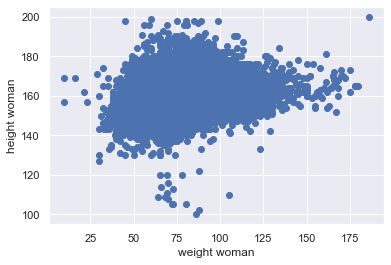

In [14]:
plt.scatter(data[data['gender'] == 1]['weight'], data[data['gender'] == 1]['height'])
plt.xlabel('weight woman')
plt.ylabel('height woman')

### Feature engineering

In [15]:
data['high_low'] = data['ap_hi'] - data['ap_lo']
data['high_low'] = data['ap_hi'] - data['ap_lo']

In [16]:
# IMT = масса / рост в метрах ** 2
data['imt'] = data['weight'] / (data['height'] / 100) ** 2
data['imt'] = data['weight'] / (data['height'] / 100) ** 2

In [19]:
train = data[:70000]
test = data[70000:]
X = train

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)


In [20]:
import xgboost as xgb
from xgboost import XGBClassifier
xgtrain = xgb.DMatrix(X_train, label=y_train)

clf = XGBClassifier(learning_rate = 0.1, n_estimators=1000, max_depth=5, min_child_weight=1,
                    gamma=0, subsample=0.8, colsample_bytree=0.8, objective = 'binary:logistic',
                    nthread=4, scale_pos_weight=1)

xgb_param = clf.get_xgb_params()

# do cross validation
print ('Start cross validation')
cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round = 5000, nfold=20, metrics=['logloss'],
     early_stopping_rounds=50, stratified=True)
print('Best number of trees = {}'.format(cvresult.shape[0]))
clf.set_params(n_estimators=cvresult.shape[0])
print('Fit on the trainings data')
clf.fit(X_train, y_train, eval_metric='logloss')
print('Overall logloss:', log_loss(y_train, clf.predict_proba(X_train)[:,1]))
print('Predict the probabilities based on features in the test set')
pred = clf.predict_proba(test, ntree_limit=cvresult.shape[0])

Start cross validation
Best number of trees = 63
Fit on the trainings data
Overall logloss: 0.5249009853801911
Predict the probabilities based on features in the test set


In [22]:
example = pd.read_csv('ml5example.csv', header=None)
example.loc[:,0] = pred[:,0]
example.to_csv('submit0.csv', header=False, index=False)